## Análise de dados dos filmes exibidos no Brasil 

In [219]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from datetime import datetime
import seaborn as sns
import os
import geopandas as gpd

In [209]:
# Pasta dos arquivos
pasta = '/Users/bentofh/Documents/GitHub/ancine/arquivos_parquet/'

In [210]:
# Lista para armazenar os dataframes
dataframes = []

# Range de análise 
ano_min_analise = 2014
ano_max_analise = 2024

# Itera sobre os arquivos na pasta
for ano in range(ano_min_analise, ano_max_analise):
    arquivo = os.path.join(pasta, f'BilheteriaObrasDia_{ano}.parquet')
    df = pd.read_parquet(arquivo)
    dataframes.append(df)

# Combina todos os dataframes em um único
df_total = pd.concat(dataframes, ignore_index=True)

In [211]:
# Gerando uma amostra 
df_amostra = df_total.sample(n=10000)

# Salva a amostra em parquet
df_amostra.to_parquet(os.path.join(pasta,r'BrilheteriaAmostra.parquet'))

# Salva a amostra em csv
df_amostra.to_csv(os.path.join(pasta,r'BrilheteriaAmostra.csv'), index=False)

In [212]:
# Importando arquivo
df = pd.read_parquet('/Users/bentofh/Documents/GitHub/ancine/arquivos_parquet/BrilheteriaAmostra.parquet')
df.head(5)

,DT_EXIBICAO,CPB_ROE,TITULO_ORIGINAL,TITULO_BRASILEIRO,PAIS,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_COMPLEXO,REGISTRO_SALA,UF_COMPLEXO,MUNICIPIO_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA,PUBLICO,NOME_SALA
758366,10/02/2014,E1402436300000,JACK RYAN: SHADOW RECRUIT,OPERAÇÃO SOMBRA: JACK RYAN,Estados Unidos,NaN,NaN,NaN,None,None,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FIL...,27.654.722/0001-16,52,GAC SERRA 2
10763433,24/12/2020,E1900440100000,TROLLS WORLD TOUR,TROLLS 2,Estados Unidos,6000024.0,17814.0,5002950.0,RJ,RIO DE JANEIRO,UNIVERSAL PICTURES INTERNATIONAL BRAZIL LTDA.,24.810.280/0001-61,4,CINEPOLIS RIO 03
13292941,01/03/2022,E2200036200000,THE BATMAN,BATMAN,Estados Unidos,6000034.0,44291.0,5006427.0,SP,VÁRZEA PAULISTA,WARNER BROS. (SOUTH) INC.,33.015.827/0001-28,56,GRUPOCINE VÁRZEA PAULISTA 03
3178809,14/08/2016,E1600434700000,SUICIDE SQUAD,ESQUADRÃO SUICIDA,Estados Unidos,6000018.0,30577.0,5005218.0,ES,VILA VELHA,WARNER BROS. (SOUTH) INC.,33.015.827/0001-28,228,CINEMARK VILA VELHA SALA 02
766579,16/08/2014,E1402417200000,TRANSFORMERS: AGE OF EXTINCTION,"TRANSFORMERS: ERA DA EXTINÇÃO, A","China, Estados Unidos",6000058.0,2618.0,5000748.0,SP,RIBEIRÃO PRETO,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FIL...,27.654.722/0001-16,71,RIBEIRÃO PRETO - SALA 05


In [213]:
# Selecionar apenas as colunas desejadas
colunas_selecionadas = ['DT_EXIBICAO', 'TITULO_BRASILEIRO', 'PAIS', 'UF_COMPLEXO', 'MUNICIPIO_COMPLEXO', 'PUBLICO']
df = df[colunas_selecionadas]

# Convertendo 'DT_EXIBICAO' para o formato de data
df['DT_EXIBICAO'] = pd.to_datetime(df['DT_EXIBICAO'], format='%d/%m/%Y')

# Extraindo dia, mês e ano
df['DIA'] = df['DT_EXIBICAO'].dt.day
df['MES'] = df['DT_EXIBICAO'].dt.month
df['ANO'] = df['DT_EXIBICAO'].dt.year


# Exibindo as primeiras linhas para verificar
df.head(5)

,DT_EXIBICAO,TITULO_BRASILEIRO,PAIS,UF_COMPLEXO,MUNICIPIO_COMPLEXO,PUBLICO,DIA,MES,ANO
758366,2014-02-10,OPERAÇÃO SOMBRA: JACK RYAN,Estados Unidos,None,None,52,10,2,2014
10763433,2020-12-24,TROLLS 2,Estados Unidos,RJ,RIO DE JANEIRO,4,24,12,2020
13292941,2022-03-01,BATMAN,Estados Unidos,SP,VÁRZEA PAULISTA,56,1,3,2022
3178809,2016-08-14,ESQUADRÃO SUICIDA,Estados Unidos,ES,VILA VELHA,228,14,8,2016
766579,2014-08-16,"TRANSFORMERS: ERA DA EXTINÇÃO, A","China, Estados Unidos",SP,RIBEIRÃO PRETO,71,16,8,2014


In [214]:
publico_por_ano = df.groupby('ANO')['PUBLICO'].sum().reset_index()
publico_por_ano

,ANO,PUBLICO
0,2014,111517
1,2015,117248
2,2016,117483
3,2017,116142
4,2018,121775
5,2019,117106
6,2020,23362
7,2021,37905
8,2022,60909
9,2023,38328


In [215]:
# Configurando as cores personalizadas
cores = {
    'roxo'      : '#918EAD',
    'verde'     : '#007573',
    'azul'      : '#8CB9C5',
    'navy'      : '#374375',
    'laranja1'  : '#FDA074',
    'laranja2'  : '#F36400',
    'amarelo'   : '#F9C770',
    'marrom'    : '#895159'
}

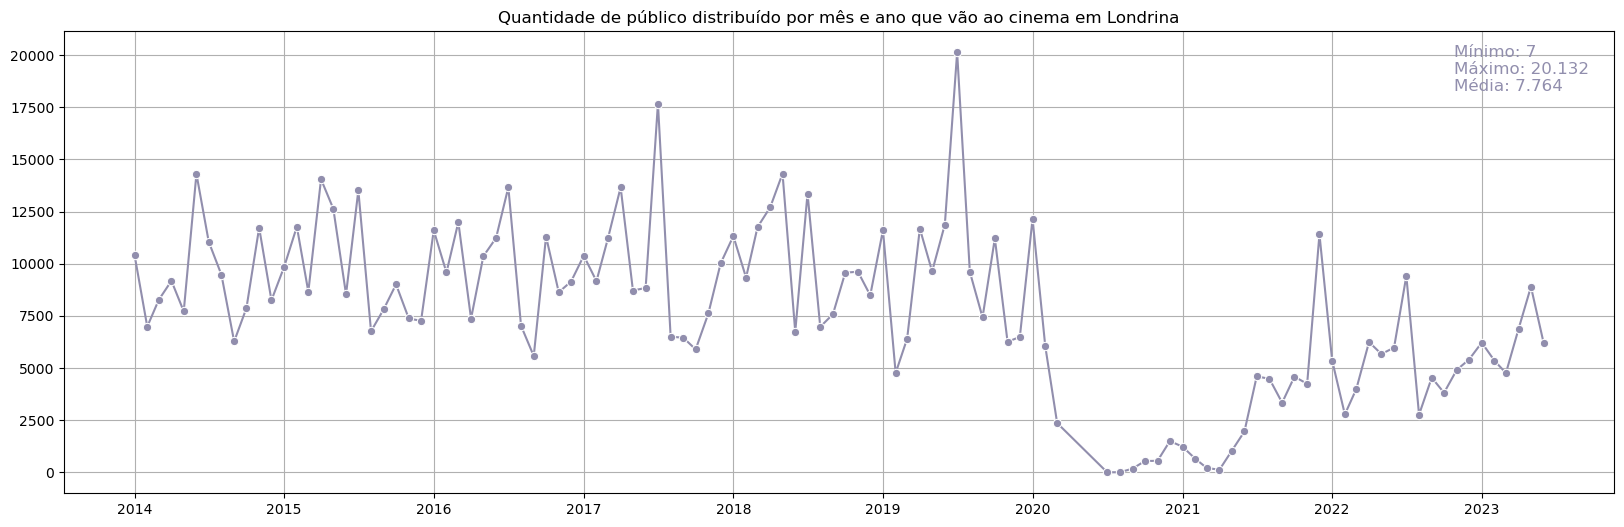

In [216]:
# Agrupar por ano e mês e somar o público
df_agrupado = df.groupby(df['DT_EXIBICAO'].dt.to_period("M"))['PUBLICO'].sum()
df_agrupado = df_agrupado.reset_index()
df_agrupado['DT_EXIBICAO'] = df_agrupado['DT_EXIBICAO'].dt.to_timestamp()

# Encontrar os valores mínimo, máximo e média
minimo = df_agrupado['PUBLICO'].min()
maximo = df_agrupado['PUBLICO'].max()
media = df_agrupado['PUBLICO'].mean()

# Criar o gráfico
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_agrupado, x='DT_EXIBICAO', y='PUBLICO', marker='o', color=cores['roxo'])

# Configurações adicionais do gráfico
plt.title('Quantidade de público distribuído por mês e ano que vão ao cinema em Londrina')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True)

# Texto informativo fora do gráfico
texto_informativo = f'Mínimo: {minimo:,}'.replace(',', '.') + '\n' + \
                    f'Máximo: {maximo:,}'.replace(',', '.') + '\n' + \
                    f'Média: {media:,.0f}'.replace(',', '.')
plt.figtext(0.82, 0.78, texto_informativo, ha='left', fontsize=12, color=cores['roxo'])

# Exibindo o gráfico
plt.show()


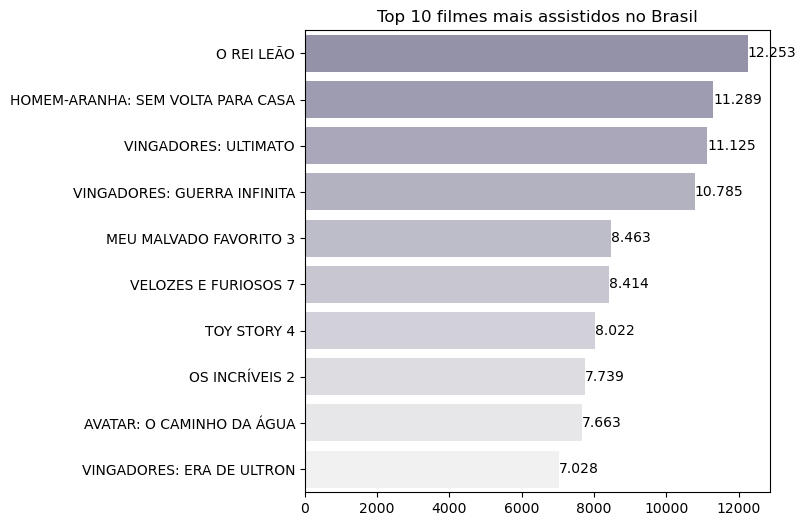

In [217]:
# Agrupar por título brasileiro e somar o público
top_films = df.groupby('TITULO_BRASILEIRO')['PUBLICO'].sum().sort_values(ascending=False).head(10)

# Gerando paletas de cores de acordo com uma cor base
cor_base = cores['roxo']

# Gerando 10 tons diferentes da cor fornecida
tons = sns.light_palette(cor_base, n_colors=10, reverse=True)

# Convertendo as cores para formato hexadecimal
tons_degrade = [mcolors.to_hex(c) for c in tons]

# Definindo a paleta de cores
colors = tons_degrade

# Criando o gráfico de barras horizontais
plt.figure(figsize=(6, 6))
barplot = sns.barplot(y=top_films.index, x=top_films.values, palette=tons_degrade)

# Configurações adicionais do gráfico
plt.title('Top 10 filmes mais assistidos no Brasil')
plt.xlabel('')
plt.ylabel('')
plt.grid(False, axis='x')

# Adicionando a soma da audiência em frente às barras
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 3,  # posição x
             p.get_y() + p.get_height() / 2,  # posição y
             f'{width:,.0f}'.replace(',', '.'),  # valor
             ha='left', 
             va='center')

# Exibindo o gráfico
plt.show()

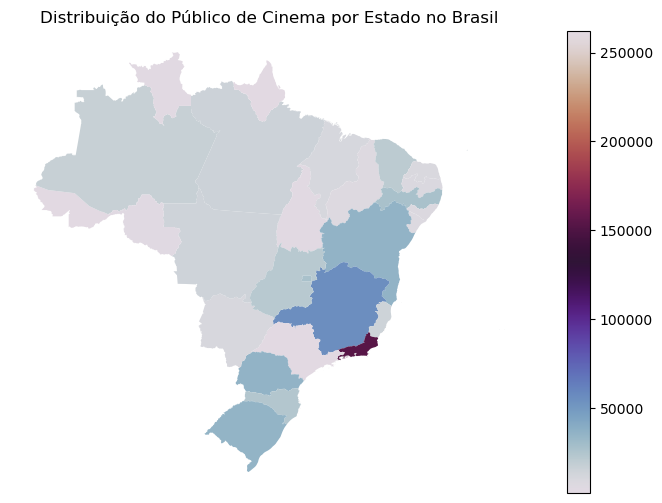

In [238]:
# Agrupar os dados por estado e somar o público
df_publico_por_estado = df.groupby('UF_COMPLEXO')['PUBLICO'].sum().reset_index()

# Carregar o shapefile do Brasil (você precisará de um shapefile do Brasil)
shapefile_path = '/Users/bentofh/Documents/GitHub/ancine/BR_UF_2022/BR_UF_2022.shp'
brasil_map = gpd.read_file(shapefile_path)

# Juntar os dados de público com o shapefile
mapa_final = brasil_map.set_index('SIGLA_UF').join(df_publico_por_estado.set_index('UF_COMPLEXO'))

# Criar o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
mapa_final.plot(column='PUBLICO', ax=ax, legend=True, cmap='twilight')

# Adicionando títulos e labels
plt.title('Distribuição do Público de Cinema por Estado no Brasil')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()